# Course Project - Terpbuy

## Part II: Connecting Python to SQL

### Submitted by Nitish kumar

- SQL file was executed in MySQL Workbench to create the Terpbuy dataset

In [1]:
# Requisite libraries have been imported, along with warnings so as to filter out UserWarning to use SQLAlchemy in place of mysql.connector
# Note: configparser is being used so as to keep the host IP address and password to access MySQL safe.

import mysql.connector
import pandas as pd

from configparser import ConfigParser

import warnings

warnings.simplefilter('ignore')

In [2]:
# Connection to MySQL Database 'terpbuy' has been established for further analysis.
# Note: configparser is being used so as to keep the host IP address and password to access MySQL safe.

parser = ConfigParser()
_ = parser.read('passkeys.cfg')

host = parser.get('my_sql', 'host')
password = parser.get('my_sql', 'password')

conn = mysql.connector.connect(host=host, database='terpbuy', user='root', password=niti1234#)

##### Query # 01 - Write a query to show the quantity of items sold by each department. Sort the results by department name.

In [3]:
# SQL Query for getting quantity of items sold per department, and resultant dataframe has been sorted by department name

df_query_01 = pd.read_sql("SELECT d.department_name AS Department_Name, SUM(ol.quantity_sold) AS Total_Quantity_Sold \
                          FROM order_line ol \
                              INNER JOIN product p ON p.product_id = ol.product_id \
                              INNER JOIN department d ON d.department_id = p.department_id \
                          GROUP BY d.department_name \
                          ORDER BY d.department_name ASC", conn, index_col='Department_Name')

df_query_01

,Total_Quantity_Sold
Department_Name,
Apparel,2336.0
Book Shop,12.0
Discs Shop,285.0
Fan Shop,2406.0
Fitness,244.0
Footwear,932.0
Golf,2355.0
Health and Beauty,64.0
Outdoors,812.0


##### Query # 02 - Using the query you wrote in Question 1, create a data visualization (e.g., a bar chart) showing all departments and the number of items each of them sold. Using a markdown cell, explain what you observe from the analysis.

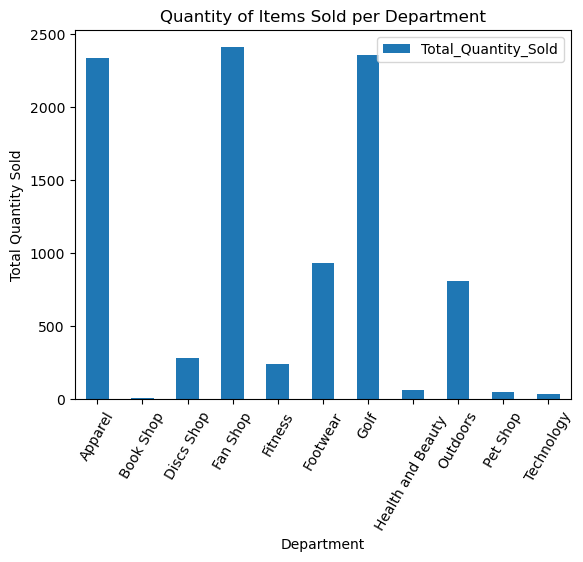

In [4]:
# Above dataframe is plotted as bar chart for analysis, with appropriate title and labels.

df_query_01.plot(kind='bar', 
                 rot=60, 
                 title='Quantity of Items Sold per Department', 
                 xlabel='Department', 
                 ylabel='Total Quantity Sold');

#### High level analysis on above data
Apparel, Fan Shop and Golf departments are generating more number of sales. There needs to be more focus on Book Shop, Discs Shop, Fitness, Health and Beauty, Pet Shop, and Technology departments in order to find out what can be done to either boost their sales or to figure out if a particular department needs to be discontinued.

##### Query # 03 - Write a query to show the number of orders placed in each year in which at least one order was placed. Hint: Search online to learn about MySQL’s YEAR() function to query data.

In [5]:
# SQL Query for getting number of orders per year

df_query_02 = pd.read_sql("SELECT YEAR(order_date) as 'Year', COUNT(*) as 'Number_Of_Orders' \
                          FROM orders o \
                          GROUP BY YEAR(order_date) \
                          HAVING COUNT(*) > 0", conn, index_col='Year')

df_query_02

,Number_Of_Orders
Year,
2018,585
2019,708
2020,497
2021,362


##### Query 04 - Using the query you wrote in Question 3, create a data visualization (e.g., a line graph) showing all years and the number of orders placed during each year, to see if there is a trend in ordering. Using a markdown cell, explain what you observe from the analysis.

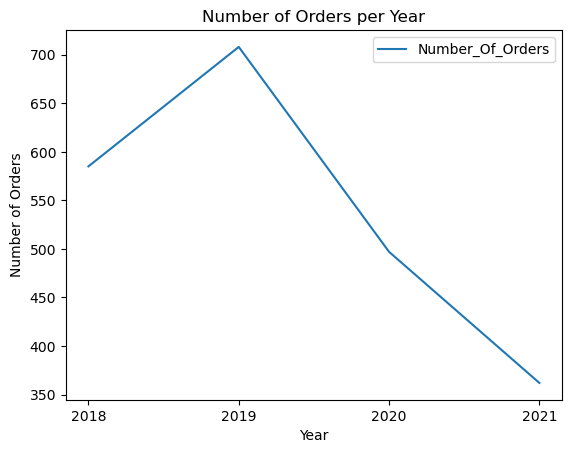

In [6]:
# Above dataframe is plotted as bar chart for analysis, with appropriate title and labels.

df_query_02.plot(kind='line', 
                 xticks=df_query_02.index, 
                 title='Number of Orders per Year', 
                 ylabel='Number of Orders');

#### High level analysis on above data
It is obvious that the number of Sales are in a downtrend for the last two years. Further analysis will need to be done in order to find out the reason.